# Week 5


Instructions (da cancellare) 
1) Write a function to compute the PageRank of the nodes in a graph (you are not allowed to use built-in functions from NetworkX).
2) Run it on your graph using = 0.15, save the total number of iterations, and check that your function returns the same results (in terms of the scores) as the built-in function from NetworkX.
3) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an interpretation to the possible difference.
4) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results.
5) Optional: Re-run the PageRank using = 0.5, save the total number of iterations, compare with the results (in terms of both the number of iterations and the cumulative distribution) obtained for = 0.15, and comment.
Hint: treat weighted graphs as unweighted & links in undirected graphs as doubly directed (each undirected link becomes a directed link in both directions). Additionally, make sure you run the PageRank algorithm on a connected graph.


In [2]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

# Load the graph from CSV files
def load_graph(nodes_file_path, edges_file_path):
    G = nx.DiGraph()
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)
            G.add_edge(row['Target'], row['Source'], weight=1)  # For undirected links

    return G

def calculate_pagerank(graph, damping_factor=0.15, num_iterations=100): #damping factor is the probability that the user will continue to click on links
    num_nodes = len(graph.nodes())
    pagerank = {node: 1 / num_nodes for node in graph.nodes()}  # Initialize PageRank equally for all nodes (1/N)
    iteration_count = 0 #to keep track of the number of iterations

    for _ in range(num_iterations):
        iteration_count += 1
        new_pagerank = {node: (1 - damping_factor) / num_nodes for node in graph.nodes()}  # (1-d)/N part
        for node in graph.nodes():
            for neighbor in graph.neighbors(node):
                new_pagerank[neighbor] += damping_factor * pagerank[node] / len(list(graph.neighbors(node))) # d * (PR(i)/L(i)) part

        # Check convergence
        diff = sum([abs(new_pagerank[node] - pagerank[node]) for node in graph.nodes()])
        if diff < 1e-6:
            print(f'Converged after {iteration_count} iterations.')
            break
        
        pagerank = new_pagerank

    return pagerank, iteration_count

if __name__ == "__main__":
    nodes_file_path = '../Graph/nodes.csv'
    edges_file_path = '../Graph/edges.csv'

    # Load the graph
    graph = load_graph(nodes_file_path, edges_file_path)

    # Calculate PageRank
    pagerank, iteration_count = calculate_pagerank(graph)

    # Assign PageRank values to nodes and print
    for node, rank in pagerank.items():
        graph.nodes[node]['pagerank'] = rank
    print(graph.nodes(data=True))
    
    
    #print the node with the highest pagerank
    max_pagerank = max(pagerank, key=pagerank.get)
    print(f'The node with the highest PageRank is {graph.nodes[max_pagerank]["label"]} with a PageRank of {pagerank[max_pagerank]}.')
    
    #print the top 5 node with the highest pagerank as you did for the best one
    top_5_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)[:5]
    print(f'The top 5 nodes with the highest PageRank are:')
    for node in top_5_pagerank:
        print(f'{graph.nodes[node]["label"]} with a PageRank of {pagerank[node]}.')
        
    
    



Converged after 6 iterations.
[('5097316', {'label': 'ROSE', 'pagerank': 0.028780421775777464}), ('5098095', {'label': 'JACK', 'pagerank': 0.024727069521023652}), ('5097875', {'label': 'CAL', 'pagerank': 0.021152206585810525}), ('5098619', {'label': 'MOLLY', 'pagerank': 0.017157498479811406}), ('5098545', {'label': 'SMITH', 'pagerank': 0.016755920621620225}), ('5101061', {'label': 'LIGHTOLLER', 'pagerank': 0.017078435694338336}), ('5096969', {'label': 'LOVETT', 'pagerank': 0.017969919726246442}), ('5097941', {'label': 'LOVEJOY', 'pagerank': 0.017421873353520804}), ('5098606', {'label': 'ANDREWS', 'pagerank': 0.016559715243617986}), ('5097894', {'label': 'RUTH', 'pagerank': 0.017515474084209094}), ('5098041', {'label': 'OLD ROSE', 'pagerank': 0.015856307524827303}), ('5096948', {'label': 'BODINE', 'pagerank': 0.01565138368230474}), ('5098128', {'label': 'FABRIZIO', 'pagerank': 0.01590900898076628}), ('5098463', {'label': 'WOMAN', 'pagerank': 0.014815920253893562}), ('5098583', {'label':

In [3]:
nx.pagerank(graph, alpha=0.15)

{'5097316': 0.028780012822921707,
 '5098095': 0.024726866391566585,
 '5097875': 0.021151914611084347,
 '5098619': 0.017157442678233662,
 '5098545': 0.01675595953741938,
 '5101061': 0.017078391247198847,
 '5096969': 0.017969845987598734,
 '5097941': 0.01742179618617019,
 '5098606': 0.01655970418801565,
 '5097894': 0.01751533088130973,
 '5098041': 0.015856321900401302,
 '5096948': 0.01565135753226635,
 '5098128': 0.015909030842476978,
 '5098463': 0.014815954255358603,
 '5098583': 0.01548508661091741,
 '5101981': 0.014698662308785736,
 '5100134': 0.01412782991319456,
 '5097212': 0.014478396116759409,
 '5101285': 0.013834411220743354,
 '5101840': 0.013834411220743354,
 '5100235': 0.013705772770651846,
 '5098242': 0.014360688245379612,
 '5102690': 0.013787946014755555,
 '5099090': 0.014721432714880448,
 '5098717': 0.013302512740776994,
 '5097994': 0.01410566620276334,
 '5101041': 0.013814320275458439,
 '5098541': 0.013314838767772858,
 '5098267': 0.012601112042765688,
 '5099110': 0.01387361

Converged after 6 iterations.


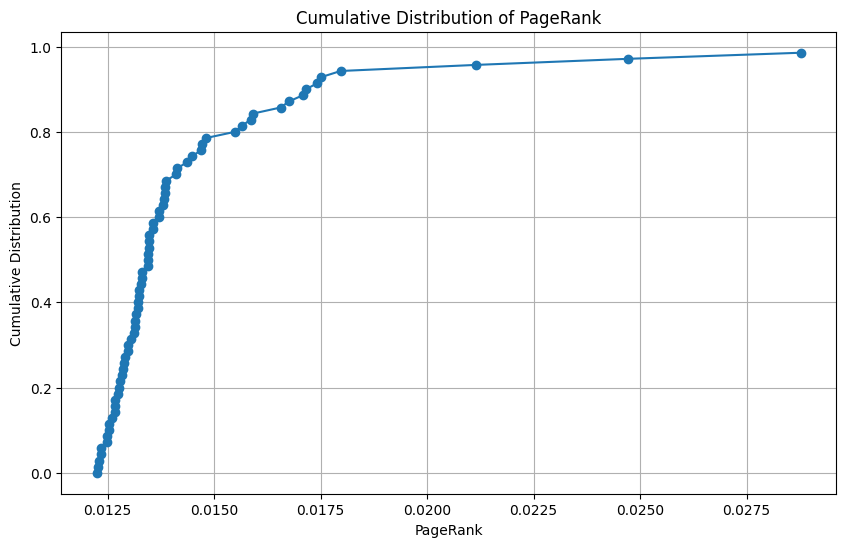

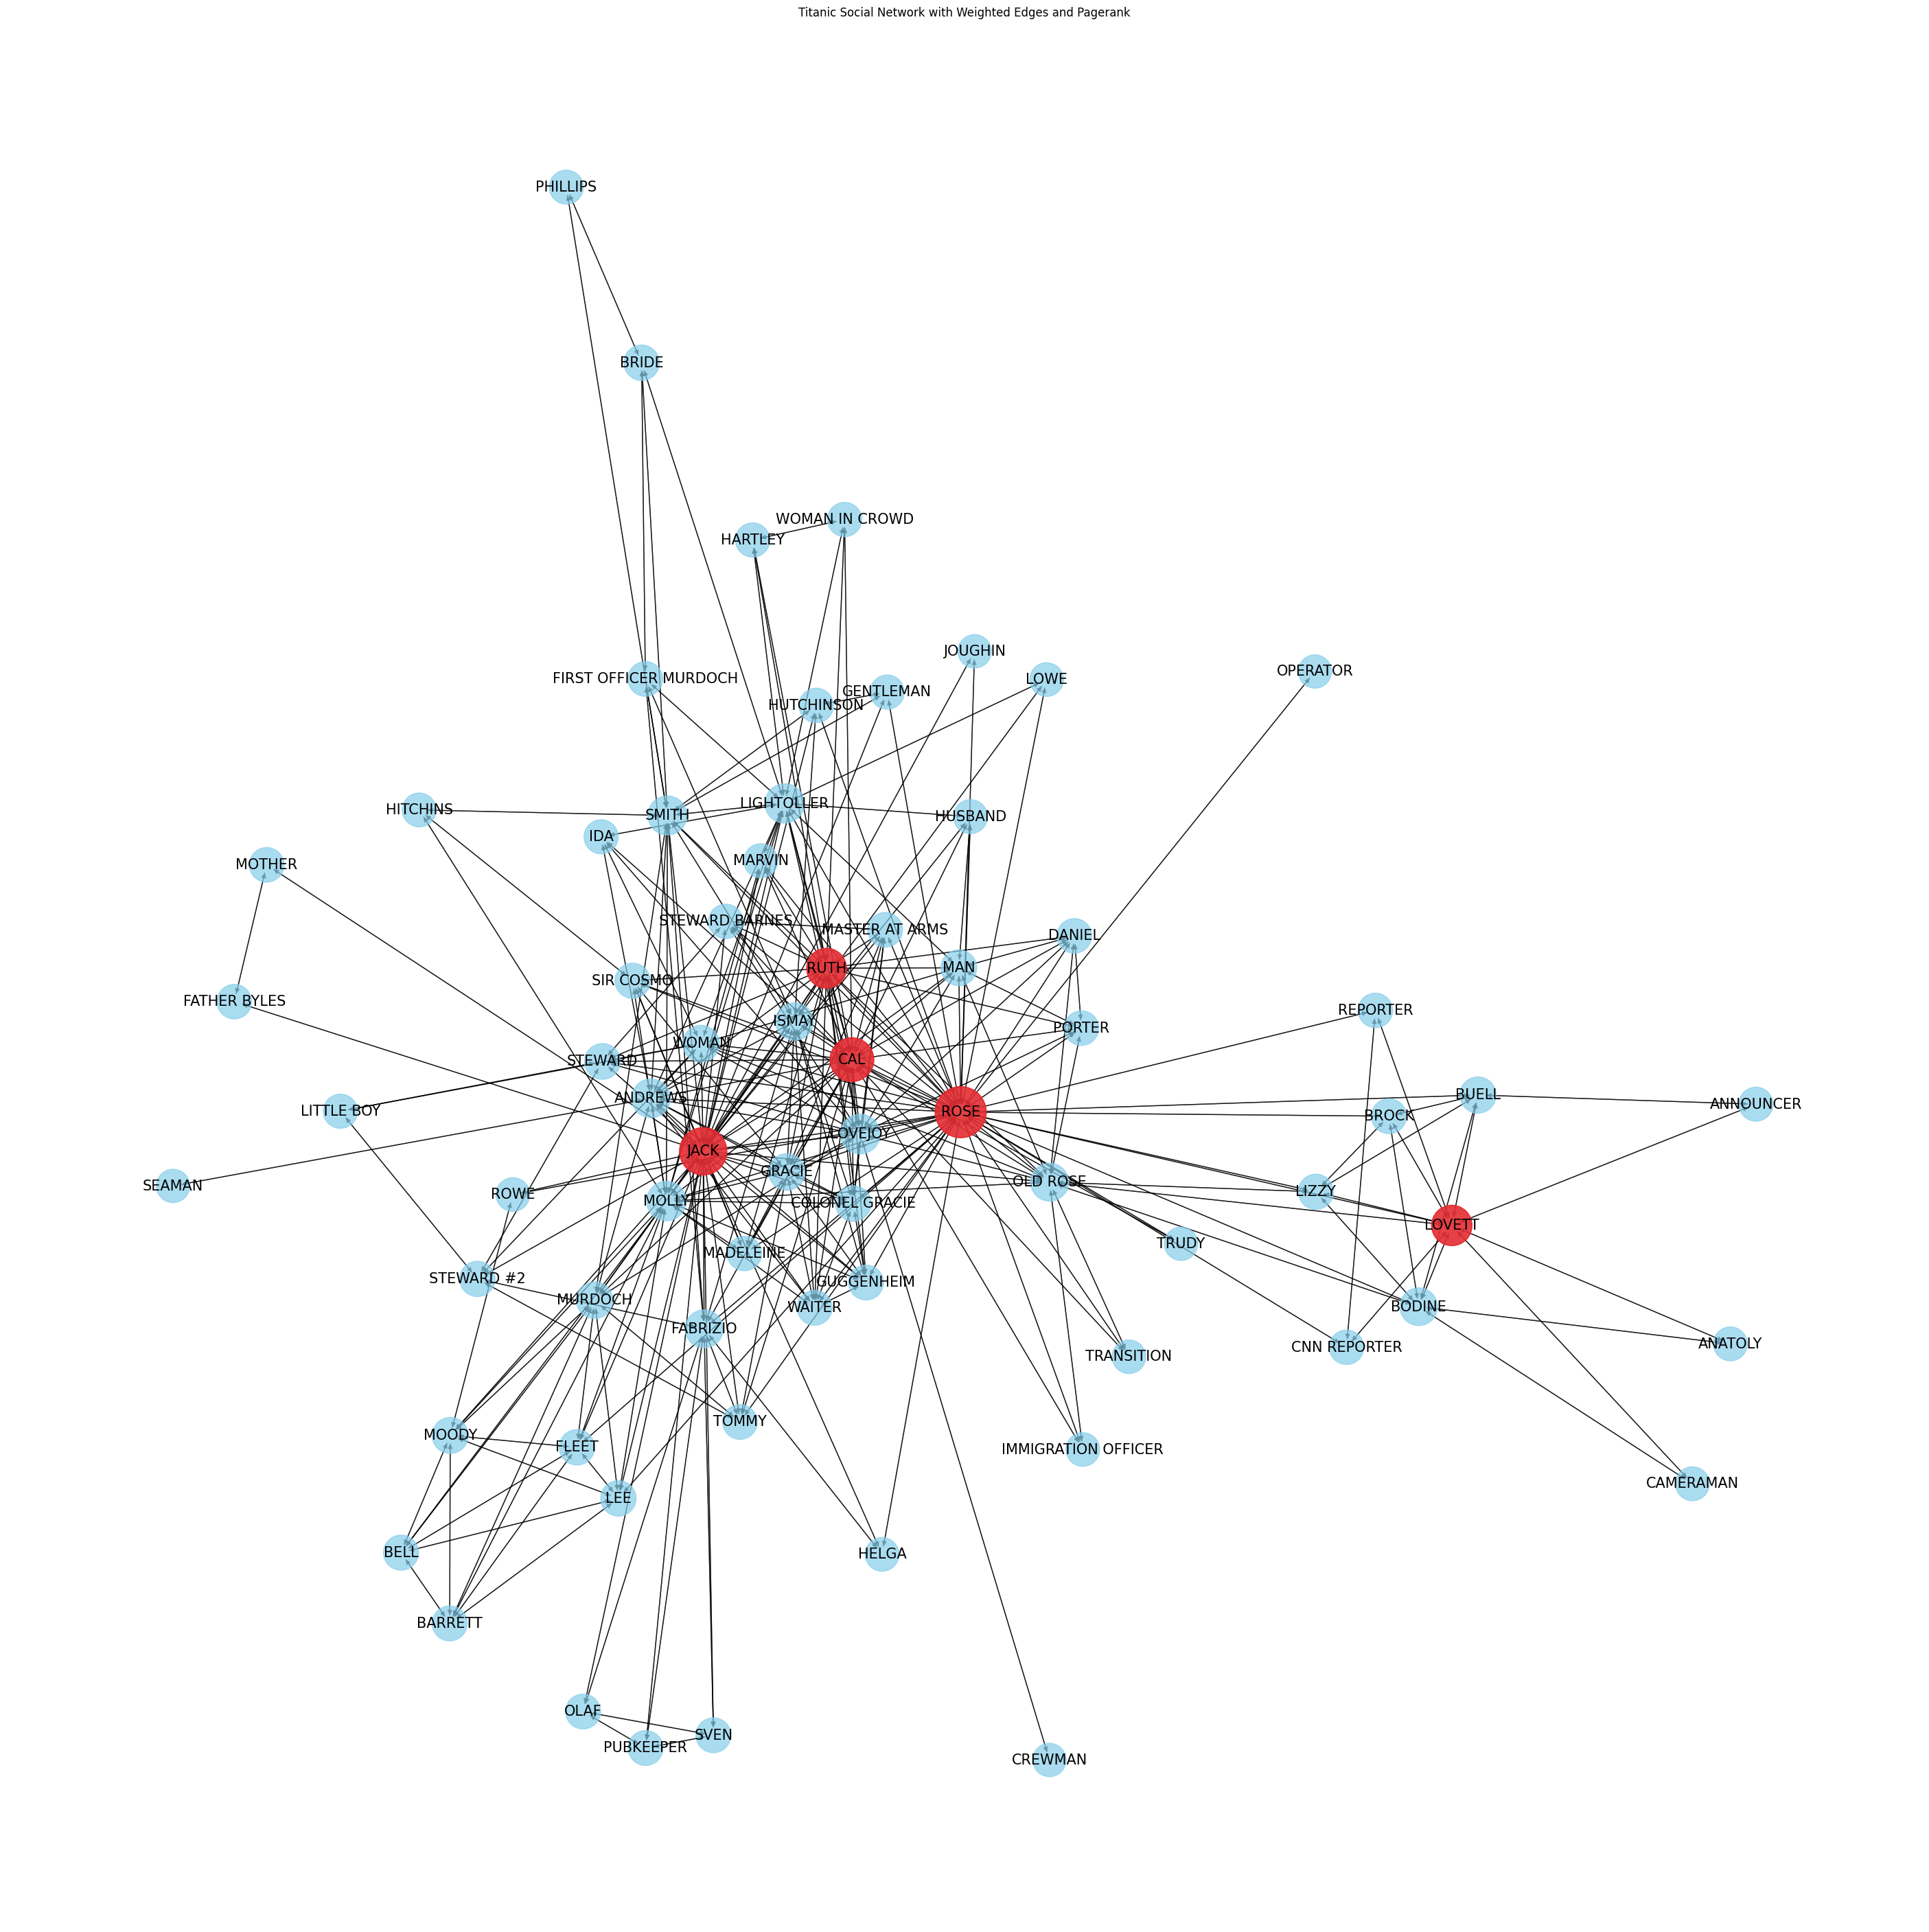

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Load the graph
G = load_graph('../Graph/nodes.csv','../Graph/edges.csv')

# Compute pagerank
pagerank, _ = calculate_pagerank(G)

# Plot the cumulative distribution for PageRank
plot_cumulative_distribution(pagerank, 'PageRank')

# Custom plot to visualize the graph
id_to_name = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(36, 36))
pos = nx.spring_layout(G, seed=42)
node_sizes = [pagerank[node] * 100000 for node in G.nodes()]
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
labels = {node: id_to_name[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
top_5_nodes = list(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_5_nodes], node_color='red', node_size=[pagerank[node] * 100000 for node, _ in top_5_nodes], alpha=0.7)
plt.title("Titanic Social Network with Weighted Edges and Pagerank")
plt.axis("off")
plt.show()